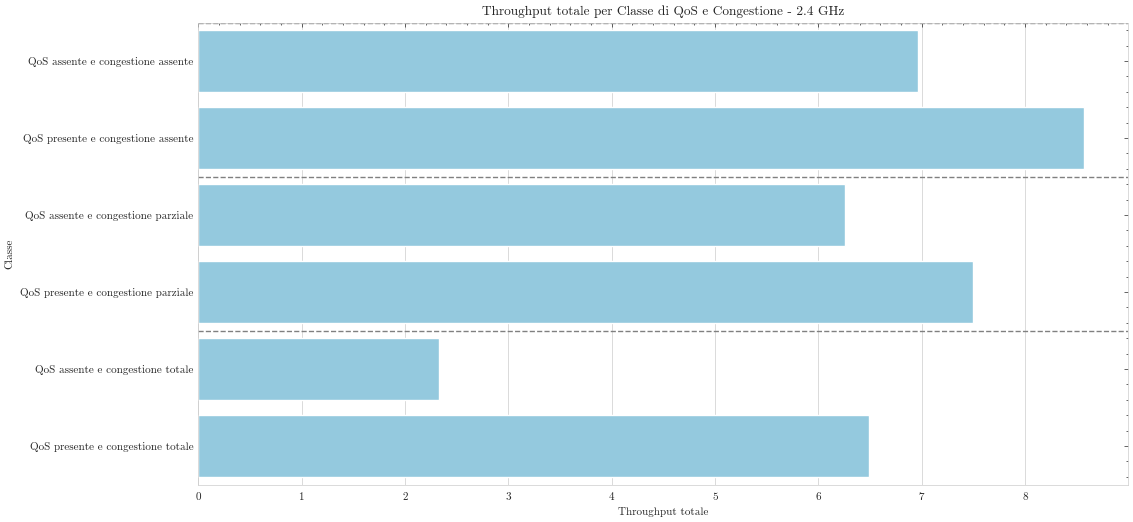

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dati delle categorie e dei totali
categorie = {
    "QoS assente e congestione assente": 6.96, #t1_c0 
    "QoS presente e congestione assente": 8.57, #t2_c0
    "QoS assente e congestione parziale": 6.26, #t1_c1
    "QoS presente e congestione parziale": 7.50, #t2_c1
    "QoS assente e congestione totale": 2.33, #t1_c2
    "QoS presente e congestione totale": 6.49 #t2_c2
}

# Creazione di un DataFrame
df = pd.DataFrame(list(categorie.items()), columns=['Classe', 'Throughput'])

# Creazione del grafico a barre orizzontali con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Throughput', y='Classe', data=df, color='skyblue')

# Aggiunta di separatori verticali ogni due barre
for i in range(0, len(df), 2):
    plt.axhline(i - 0.5, color='gray', linestyle='--')

plt.xlabel('Throughput totale')
plt.title('Throughput totale per Classe di QoS e Congestione - 2.4 GHz')
plt.grid(axis='x')

# Mostra il grafico
plt.show()

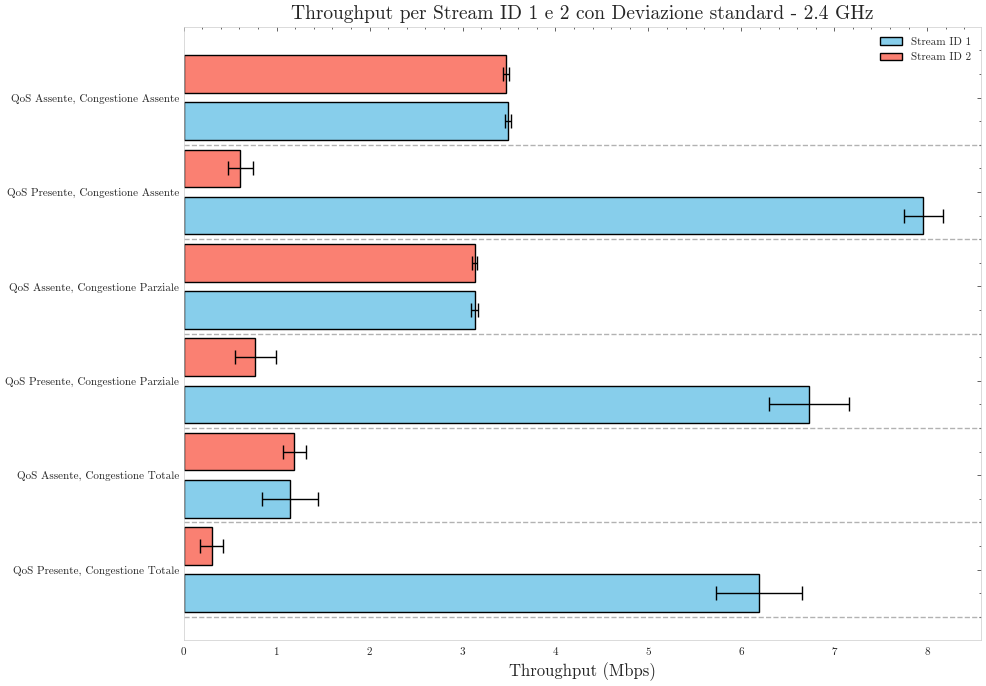

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Dizionari per le medie del throughput e le varianze
throughput_medie = {
    "Stream ID 1": [3.49, 7.96, 3.13, 6.73, 1.14, 6.19],
    "Stream ID 2": [3.47, 0.61, 3.13, 0.77, 1.19, 0.30]
}

throughput_varianze = {
    "Stream ID 1": [0.000972, 0.04425, 0.00144, 0.1835, 0.0919, 0.20920],
    "Stream ID 2": [0.000972, 0.01867, 0.00092, 0.04963, 0.01540, 0.01466]
}

# Etichette delle condizioni per il grafico
categorie = [
    "QoS Assente, Congestione Assente",
    "QoS Presente, Congestione Assente",
    "QoS Assente, Congestione Parziale",
    "QoS Presente, Congestione Parziale",
    "QoS Assente, Congestione Totale",
    "QoS Presente, Congestione Totale"
]

# Impostazioni per il grafico
fig, ax = plt.subplots(figsize=(10, 7))

# Bar orizzontali per Stream ID 1 e 2 alternati (invertiti)
ax.barh(np.arange(len(categorie)) * 2, throughput_medie["Stream ID 1"][::-1], xerr=np.sqrt(throughput_varianze["Stream ID 1"][::-1]),
        capsize=5, color='skyblue', edgecolor='black', label="Stream ID 1", height=0.8)
ax.barh(np.arange(len(categorie)) * 2 + 1, throughput_medie["Stream ID 2"][::-1], xerr=np.sqrt(throughput_varianze["Stream ID 2"][::-1]),
        capsize=5, color='salmon', edgecolor='black', label="Stream ID 2", height=0.8)

# Etichette e titolo
ax.set_yticks(np.arange(len(categorie)) * 2 + 0.5)
ax.set_yticklabels(categorie[::-1])
ax.set_title("Throughput per Stream ID 1 e 2 con Deviazione standard - 2.4 GHz", fontsize=14)
ax.set_xlabel("Throughput (Mbps)", fontsize=12)

# Aggiungi linee grigie ogni categoria
for i in range(len(categorie)):
    ax.axhline(i * 2 - 0.5, color='gray', linestyle='--', alpha=0.6)

# Legenda
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


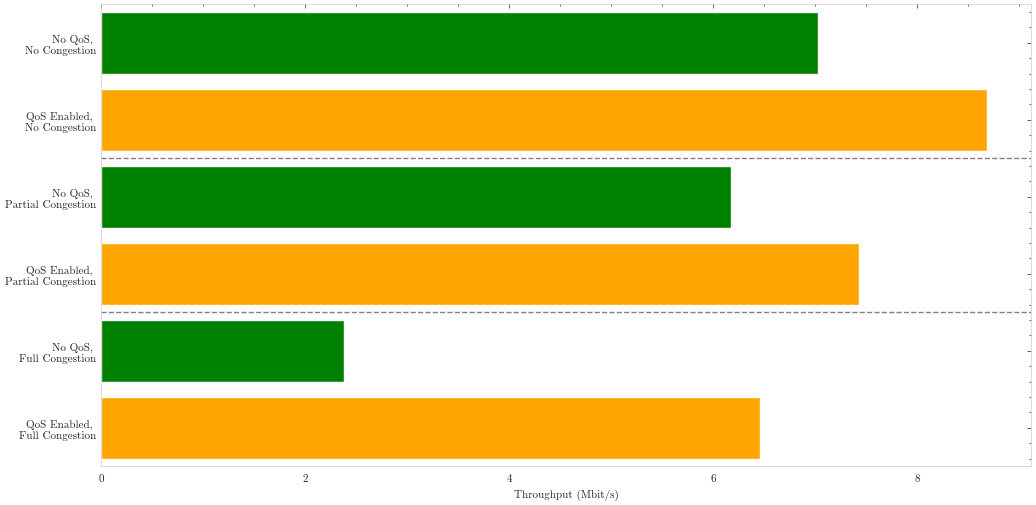

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams['axes.grid'] = False

# Dati delle categorie e dei totali
categorie = {
    "QoS Enabled, \nFull Congestion": 6.46,  # t2_c2
    "No QoS, \nFull Congestion": 2.38,      # t1_c2
    "QoS Enabled, \nPartial Congestion": 7.43,  # t2_c1
    "No QoS, \nPartial Congestion": 6.17,       # t1_c1
    "QoS Enabled, \nNo Congestion": 8.68,  # t2_c0
    "No QoS, \nNo Congestion": 7.03        # t1_c0
}

# Creazione di un DataFrame
df = pd.DataFrame(list(categorie.items()), columns=['', 'Throughput'])

# Creazione del grafico a barre orizzontali con colori alternati
plt.figure(figsize=(12, 6))

# Definisci una palette di colori
colors = ['orange', 'green']

# Disegna le barre con colori alternati
for i, (index, row) in enumerate(df.iterrows()):
    plt.barh(i, row['Throughput'], color=colors[i % 2])

# Imposta gli assi e le etichette
plt.yticks(range(len(df)), df[''])
plt.xlabel('Throughput (Mbit/s)')

# Aggiunta di separatori verticali ogni due barre
for i in range(0, len(df), 2):
    if i != 0:
        plt.axhline(i - 0.5, color='gray', linestyle='--')

# Imposta i limiti dell'asse Y per rimuovere gli spazi bianchi
plt.ylim(-0.5, len(df) - 0.5)

# Salva e mostra il grafico
plt.savefig("total.svg", format="svg", dpi=300)
plt.show()


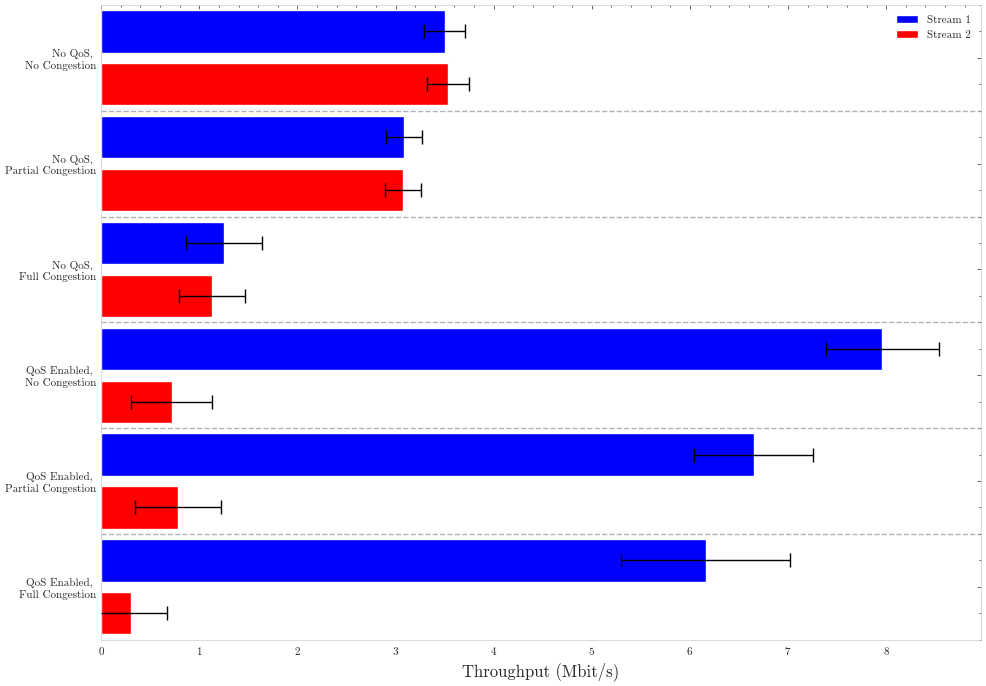

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scienceplots

# Imposta lo stile di Seaborn
#sns.set(style="whitegrid")
plt.style.use(['science','ieee','no-latex'])
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams['axes.grid'] = False

# Dizionari per le medie del throughput e le varianze
#throughput_medie = {
#    "Stream ID 1": [3.50, 7.96, 3.09, 6.65, 1.25, 6.16], #AC_VO
#    "Stream ID 2": [3.53, 0.72, 3.08, 0.78, 1.13, 0.30] #AC_BK
#}

#throughput_varianze = {
#    "Stream ID 1": [0.04503, 0.33110, 0.03411, 0.36659, 0.14950, 0.73851],
#    "Stream ID 2": [0.04582, 0.16874, 0.03389, 0.19266, 0.11543, 0.13453]
#}

# Dizionari per le medie del throughput e le varianze
throughput_medie = {
    "Stream ID 1": [3.50, 3.09, 1.25, 7.96, 6.65, 6.16], #AC_VO
    "Stream ID 2": [3.53, 3.08, 1.13, 0.72, 0.78, 0.30] #AC_BK
}

throughput_varianze = {
    "Stream ID 1": [0.04503, 0.03411, 0.14950, 0.33110, 0.36659, 0.73851],
    "Stream ID 2": [0.04582, 0.03389, 0.11543, 0.16874, 0.19266, 0.13453]
}

# Etichette delle condizioni per il grafico
categorie = [
    "No QoS, \nNo Congestion",
    "No QoS, \nPartial Congestion",
    "No QoS, \nFull Congestion",
    "QoS Enabled, \nNo Congestion",
    "QoS Enabled, \nPartial Congestion",
    "QoS Enabled, \nFull Congestion"
]

# Impostazioni per il grafico
fig, ax = plt.subplots(figsize=(10, 7))

# Bar orizzontali per Stream ID 1 e 2 alternati (invertiti)
ax.barh(np.arange(len(categorie)) * 2 + 1, throughput_medie["Stream ID 1"][::-1], xerr=np.sqrt(throughput_varianze["Stream ID 1"][::-1]),
        capsize=5, color='blue', label="Stream 1", height=0.8)
ax.barh(np.arange(len(categorie)) * 2, throughput_medie["Stream ID 2"][::-1], xerr=np.sqrt(throughput_varianze["Stream ID 2"][::-1]),
        capsize=5, color='red', label="Stream 2", height=0.8)
# Etichette e titolo
ax.set_yticks(np.arange(len(categorie)) * 2 + 0.5)
ax.set_yticklabels(categorie[::-1])
#ax.set_title("Throughput for Stream ID 1 and 2", fontsize=14)
ax.set_xlabel("Throughput (Mbit/s)", fontsize=12)

# Aggiungi linee grigie ogni categoria
for i in range(len(categorie)):
    if i != 0: ax.axhline(i * 2 - 0.5, color='gray', linestyle='--', alpha=0.6)

ax.set_xlim(left=0)  # Impostando il limite inferiore dell'asse X a 0
ax.set_ylim(-0.5, len(categorie) * 2 - 0.5)

# Legenda
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.savefig("output_ac.svg", format="svg", dpi=300)
plt.show()


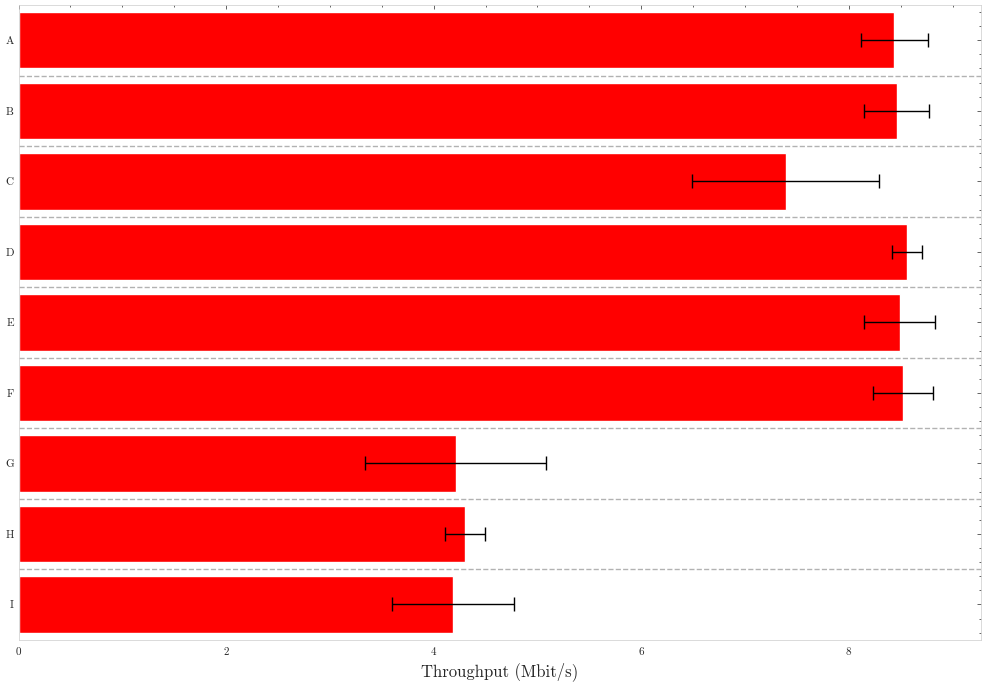

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scienceplots

# Imposta lo stile
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams['axes.grid'] = False

# Dizionari per le medie del throughput e le varianze
throughput_medie = {
    "Throughput": [8.44, 8.46, 7.39, 8.56, 8.49, 8.52, 4.21, 4.30, 4.19],  # AC_VO
}

throughput_varianze = {
    "Throughput": [0.107, 0.10, 0.806, 0.021, 0.117, 0.082, 0.756, 0.037, 0.346]
}

# Etichette delle condizioni per il grafico
categorie = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I"
]

# Impostazioni per il grafico
fig, ax = plt.subplots(figsize=(10, 7))

# Creazione del grafico a barre orizzontali
ax.barh(np.arange(len(categorie)), throughput_medie["Throughput"][::-1],
        xerr=np.sqrt(throughput_varianze["Throughput"][::-1]),
        capsize=5, color='red', label="Throughput", height=0.8)

# Etichette e titolo
ax.set_yticks(np.arange(len(categorie)))
ax.set_yticklabels(categorie[::-1])  # Invertiamo l'ordine delle etichette per visualizzare dall'alto verso il basso
ax.set_xlabel("Throughput (Mbit/s)", fontsize=12)

# Aggiunta di linee grigie ogni categoria
for i in range(len(categorie)):
    if i != 0:
        ax.axhline(i - 0.5, color='gray', linestyle='--', alpha=0.6)

# Rimozione dello spazio bianco in alto e in basso
ax.set_ylim(-0.5, len(categorie) - 0.5)

# Imposta il limite inferiore dell'asse X a 0
ax.set_xlim(left=0)

# Salvataggio e visualizzazione del grafico
plt.tight_layout()
plt.savefig("tx_pwr.svg", format="svg", dpi=300)
plt.show()
